# Summary of this Page: Filled Linear Regressions

- This page provides the Linear Regressions on the filled datasheet for the following outcomes: KS2, KS4, Substance, Convictions

# Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
!pip install statsmodels
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf
data = pd.read_csv("final_data.csv")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Scale numerical variables and make sure categorical ones are set as categories

In [30]:
scaler = MinMaxScaler()
data_scaled = data.copy()
scalable_columns = ['number_in_care', 'number_in_care_filled', 'pt_placed_inside_la', 'pt_private_provis', 'pt_3_more_placemts', 'pt_placed_inside_la_filled','pt_private_provis_filled', 'pt_3_more_placemts_filled', 'per_child_spend', 'budget_per_child']
data_scaled[scalable_columns] = scaler.fit_transform(data_scaled[scalable_columns])
print(data_scaled[scalable_columns].describe())

data['ofsted_overall'] =data['ofsted_overall'].astype("category")
data['ofsted_overall_filled'] =data['ofsted_overall_filled'].astype("category")
data['ofsted_care'] =data['ofsted_care'].astype("category")
data['ofsted_care_filled'] =data['ofsted_care_filled'].astype("category")
data['ofsted_leaders'] =data['ofsted_leaders'].astype("category")
data['ofsted_leaders_filled'] =data['ofsted_leaders_filled'].astype("category")
data['ofsted_help_protection'] =data['ofsted_help_protection'].astype("category")
data['ofsted_help_protection_filled'] =data['ofsted_help_protection_filled'].astype("category")

#check categorical variables are set as categories


       number_in_care  number_in_care_filled  pt_placed_inside_la  \
count      750.000000             750.000000           747.000000   
mean         0.246364               0.246364             0.613078   
std          0.165839               0.165839             0.189203   
min          0.000000               0.000000             0.000000   
25%          0.140736               0.140736             0.482759   
50%          0.202375               0.202375             0.632184   
75%          0.303919               0.303919             0.747126   
max          1.000000               1.000000             1.000000   

       pt_private_provis  pt_3_more_placemts  pt_placed_inside_la_filled  \
count         747.000000          739.000000                  750.000000   
mean            0.361365            0.515785                    0.611913   
std             0.153186            0.140677                    0.189822   
min             0.000000            0.000000                    0.000000  

# Split into testing and training data

In [31]:
datatrain, datatest = train_test_split(data, test_size = 0.25, random_state = 7)

## simple LR for a nice plot

Text(0.5, 1.0, 'Linear Regression of % KS4 expectations on Per Child Spend - Training data predictions')

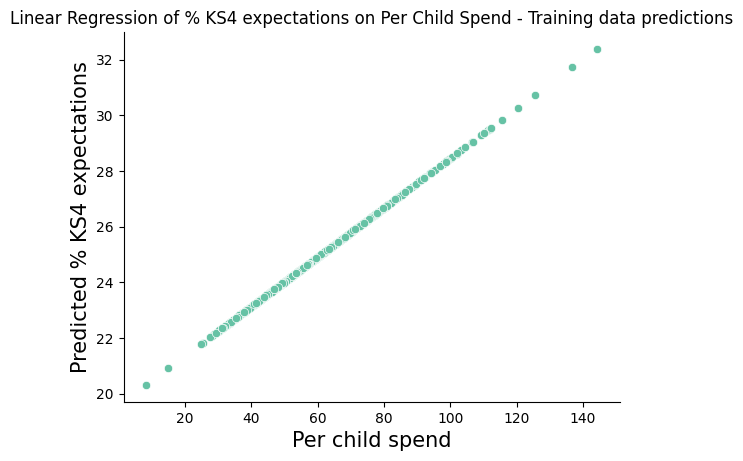

In [32]:
sns.set_palette("Set2")
model = smf.ols('pt_ks4_expectations_filled ~per_child_spend', data = datatrain).fit()
model.predict(datatrain), datatrain['pt_ks4_expectations_filled']
sns.scatterplot(x = datatrain['per_child_spend'], y = model.predict(datatrain))
sns.despine()
plt.xlabel("Per child spend", fontsize = 15)
plt.ylabel("Predicted % KS4 expectations", fontsize = 15)
plt.title("Linear Regression of % KS4 expectations on Per Child Spend - Training data predictions")


# Linear regressions

Modelling pt_ks4_expectations on budget, la_name, reporting year, pt 3 or more placements, pt private provision, pt placed inside la

## PT_KS4_EXPECTATIONS

In [33]:

model1 = smf.ols('pt_ks4_expectations_filled ~per_child_spend+ reporting_year + number_in_care_filled + pt_3_more_placemts_filled +pt_private_provis_filled +pt_placed_inside_la_filled +ofsted_overall_filled +ofsted_leaders_filled +ofsted_care_filled +ofsted_help_protection_filled', data = datatrain).fit()
print(model1.summary())
#would use mse here from sklearn but its struggling with missing values
mse = ((model1.predict(datatest) - datatest['pt_ks4_expectations_filled'])**2).mean()
mse

                                OLS Regression Results                                
Dep. Variable:     pt_ks4_expectations_filled   R-squared:                       0.201
Model:                                    OLS   Adj. R-squared:                  0.175
Method:                         Least Squares   F-statistic:                     7.595
Date:                        Wed, 24 Apr 2024   Prob (F-statistic):           8.41e-18
Time:                                13:25:54   Log-Likelihood:                -1855.8
No. Observations:                         562   AIC:                             3750.
Df Residuals:                             543   BIC:                             3832.
Df Model:                                  18                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

42.78803784375079

Same as above, but without including reporting_year and la_name as predictors

In [34]:
model1 = smf.ols('pt_ks4_expectations_filled ~per_child_spend+ reporting_year + number_in_care_filled + pt_3_more_placemts_filled +pt_private_provis_filled +pt_placed_inside_la_filled +ofsted_overall_filled +ofsted_leaders_filled +ofsted_care_filled +ofsted_help_protection_filled', data = datatrain).fit()
print(model1.summary())



                                OLS Regression Results                                
Dep. Variable:     pt_ks4_expectations_filled   R-squared:                       0.201
Model:                                    OLS   Adj. R-squared:                  0.175
Method:                         Least Squares   F-statistic:                     7.595
Date:                        Wed, 24 Apr 2024   Prob (F-statistic):           8.41e-18
Time:                                13:25:57   Log-Likelihood:                -1855.8
No. Observations:                         562   AIC:                             3750.
Df Residuals:                             543   BIC:                             3832.
Df Model:                                  18                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [35]:
rmse = np.sqrt(mse)
standardised_rsme = rmse / np.std(datatest['pt_ks4_expectations_filled'])

In [36]:
rmse

6.541256595162033

In [37]:
standardised_rsme

0.9210478127945613

### Visualisations

<Axes: xlabel='pt_ks4_expectations', ylabel='pt_placed_inside_la'>

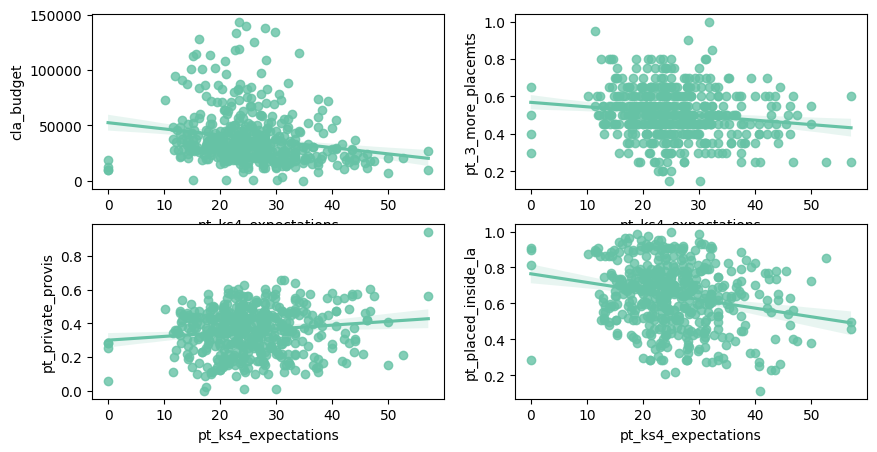

In [23]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2, figsize = (10,5))

sns.regplot(x="pt_ks4_expectations", y="cla_budget", data=data_scaled, ax = axs[0,0])
sns.regplot(x="pt_ks4_expectations", y="pt_3_more_placemts", data=data_scaled, ax = axs[0,1])
sns.regplot(x="pt_ks4_expectations", y="pt_private_provis", data=data_scaled, ax = axs[1,0])
sns.regplot(x="pt_ks4_expectations", y="pt_placed_inside_la", data=data_scaled, ax = axs[1,1])

Repeat the above two models for other outcome variables: pt ks2 expectations, pt convicted and pt substance misuse problem.

## PT_ KS2_EXPECTATIONS

In [38]:
#models here
model1 = smf.ols('pt_ks2_expectations_filled ~per_child_spend + reporting_year + number_in_care_filled + pt_3_more_placemts_filled +pt_private_provis_filled +pt_placed_inside_la_filled +ofsted_overall_filled +ofsted_leaders_filled +ofsted_care_filled +ofsted_help_protection_filled', data = datatrain).fit()
print(model1.summary())

                                OLS Regression Results                                
Dep. Variable:     pt_ks2_expectations_filled   R-squared:                       0.218
Model:                                    OLS   Adj. R-squared:                  0.192
Method:                         Least Squares   F-statistic:                     8.393
Date:                        Wed, 24 Apr 2024   Prob (F-statistic):           5.35e-20
Time:                                13:26:05   Log-Likelihood:                -1949.8
No. Observations:                         562   AIC:                             3938.
Df Residuals:                             543   BIC:                             4020.
Df Model:                                  18                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [39]:
model1 = smf.ols('pt_ks2_expectations_filled ~per_child_spend + reporting_year + number_in_care_filled + pt_3_more_placemts_filled +pt_private_provis_filled +pt_placed_inside_la_filled +ofsted_overall_filled +ofsted_leaders_filled +ofsted_care_filled +ofsted_help_protection_filled', data = datatrain).fit()
print(model1.summary())
mse1 = ((model1.predict(datatest) - datatest['pt_ks4_expectations_filled'])**2).mean()
mse1

                                OLS Regression Results                                
Dep. Variable:     pt_ks2_expectations_filled   R-squared:                       0.218
Model:                                    OLS   Adj. R-squared:                  0.192
Method:                         Least Squares   F-statistic:                     8.393
Date:                        Wed, 24 Apr 2024   Prob (F-statistic):           5.35e-20
Time:                                13:26:07   Log-Likelihood:                -1949.8
No. Observations:                         562   AIC:                             3938.
Df Residuals:                             543   BIC:                             4020.
Df Model:                                  18                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

240.70225477696553

In [40]:
rmse = np.sqrt(mse1)
standardised_rsme = rmse / np.std(datatest['pt_ks2_expectations_filled'])

In [41]:
rmse

15.514582004584124

In [29]:
standardised_rsme

1.7747871835424605

### Visualisations

<Axes: xlabel='pt_ks2_expectations', ylabel='pt_placed_inside_la'>

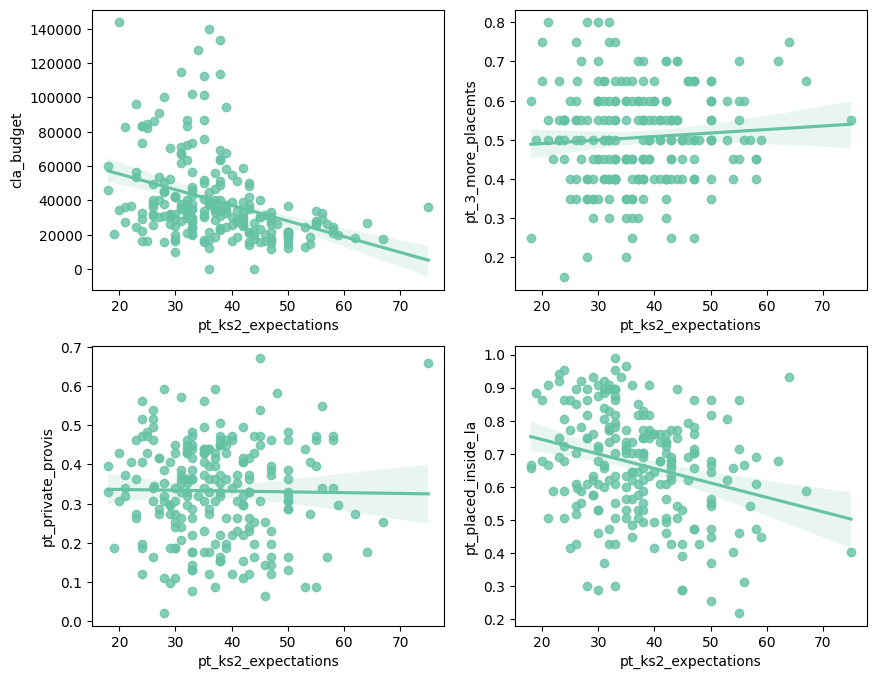

In [42]:
fig, axs = plt.subplots(2,2, figsize = (10,8))

sns.regplot(x="pt_ks2_expectations", y="cla_budget", data=data_scaled, ax = axs[0,0])
sns.regplot(x="pt_ks2_expectations", y="pt_3_more_placemts", data=data_scaled, ax = axs[0,1])
sns.regplot(x="pt_ks2_expectations", y="pt_private_provis", data=data_scaled, ax = axs[1,0])
sns.regplot(x="pt_ks2_expectations", y="pt_placed_inside_la", data=data_scaled, ax = axs[1,1])

## PT_CONVICTED

In [43]:
model1 = smf.ols('pt_convictions_filled ~ per_child_spend + reporting_year + number_in_care_filled + pt_3_more_placemts_filled +pt_private_provis_filled +pt_placed_inside_la_filled +ofsted_overall_filled +ofsted_leaders_filled +ofsted_care_filled +ofsted_help_protection_filled', data = datatrain).fit()
print(model1.summary())

                              OLS Regression Results                             
Dep. Variable:     pt_convictions_filled   R-squared:                       0.144
Model:                               OLS   Adj. R-squared:                  0.115
Method:                    Least Squares   F-statistic:                     5.062
Date:                   Wed, 24 Apr 2024   Prob (F-statistic):           9.37e-11
Time:                           13:26:29   Log-Likelihood:                -1250.4
No. Observations:                    562   AIC:                             2539.
Df Residuals:                        543   BIC:                             2621.
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [44]:
model1 = smf.ols('pt_convictions_filled ~per_child_spend  + reporting_year + number_in_care_filled + pt_3_more_placemts_filled +pt_private_provis_filled +pt_placed_inside_la_filled +ofsted_overall_filled +ofsted_leaders_filled +ofsted_care_filled +ofsted_help_protection_filled', data = datatrain).fit()
print(model1.summary())
mse2 = ((model1.predict(datatest)- datatest['pt_convictions_filled'])**2).mean()
mse2

                              OLS Regression Results                             
Dep. Variable:     pt_convictions_filled   R-squared:                       0.144
Model:                               OLS   Adj. R-squared:                  0.115
Method:                    Least Squares   F-statistic:                     5.062
Date:                   Wed, 24 Apr 2024   Prob (F-statistic):           9.37e-11
Time:                           13:26:32   Log-Likelihood:                -1250.4
No. Observations:                    562   AIC:                             2539.
Df Residuals:                        543   BIC:                             2621.
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

5.665782021205005

In [45]:
rmse = np.sqrt(mse2)
standardised_rsme = rmse / np.std(datatest['pt_convictions_filled'])


In [46]:
rmse

2.380290322881855

In [47]:
standardised_rsme

1.0117280934922708

### Visualisations

<AxesSubplot: xlabel='pt_convicted', ylabel='pt_placed_inside_la'>

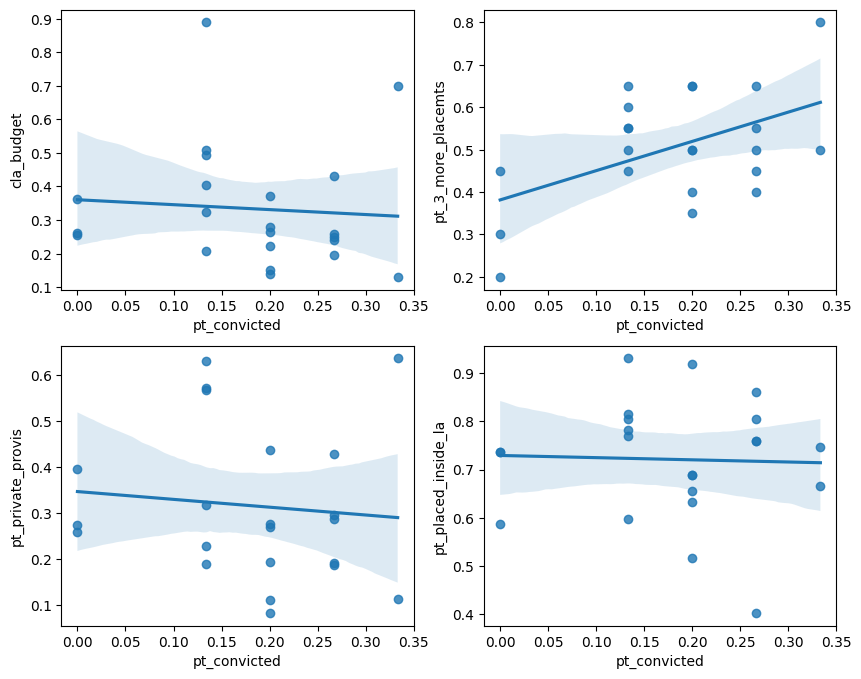

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,8))

sns.regplot(x="pt_convicted", y="cla_budget", data=data_scaled, ax = axs[0,0])
sns.regplot(x="pt_convicted", y="pt_3_more_placemts", data=data_scaled, ax = axs[0,1])
sns.regplot(x="pt_convicted", y="pt_private_provis", data=data_scaled, ax = axs[1,0])
sns.regplot(x="pt_convicted", y="pt_placed_inside_la", data=data_scaled, ax = axs[1,1])

## PT_SUBSTANCE

In [ ]:
model1 = smf.ols('pt_substance_filled ~per_child_spend + reporting_year + number_in_care_filled + pt_3_more_placemts_filled +pt_private_provis_filled +pt_placed_inside_la_filled +ofsted_overall_filled +ofsted_leaders_filled +ofsted_care_filled +ofsted_help_protection_filled', data = datatrain).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     pt_substance_filled   R-squared:                       0.141
Model:                             OLS   Adj. R-squared:                  0.113
Method:                  Least Squares   F-statistic:                     4.972
Date:                 Thu, 07 Mar 2024   Prob (F-statistic):           1.67e-10
Time:                         09:23:38   Log-Likelihood:                -1512.5
No. Observations:                  562   AIC:                             3063.
Df Residuals:                      543   BIC:                             3145.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
model1 = smf.ols('pt_substance_filled ~per_child_spend + reporting_year + number_in_care_filled + pt_3_more_placemts_filled +pt_private_provis_filled +pt_placed_inside_la_filled +ofsted_overall_filled +ofsted_leaders_filled +ofsted_care_filled +ofsted_help_protection_filled', data = datatrain).fit()
print(model1.summary())
mse3 = ((model1.predict(datatest)- datatest['pt_substance_filled'])**2).mean()
mse3

                             OLS Regression Results                            
Dep. Variable:     pt_substance_filled   R-squared:                       0.141
Model:                             OLS   Adj. R-squared:                  0.113
Method:                  Least Squares   F-statistic:                     4.972
Date:                 Thu, 18 Apr 2024   Prob (F-statistic):           1.67e-10
Time:                         15:33:44   Log-Likelihood:                -1512.5
No. Observations:                  562   AIC:                             3063.
Df Residuals:                      543   BIC:                             3145.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

10.358032291422234

In [ ]:
rmse = np.sqrt(mse3)
standardised_rsme = rmse / np.std(datatest['pt_substance_filled'])

In [ ]:
rmse

3.2183897047160452

In [ ]:
standardised_rsme

0.9596390643167203

### Visualisations

<AxesSubplot: xlabel='pt_placed_inside_la', ylabel='pt_substance'>

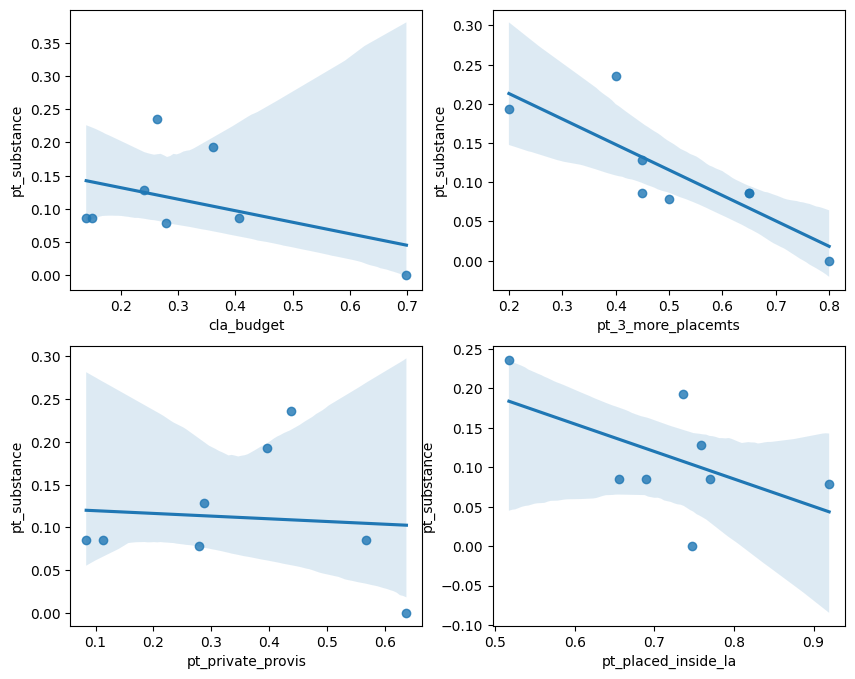

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,8))

sns.regplot(x="cla_budget", y="pt_substance", data=train_data, ax = axs[0,0])
sns.regplot(x="pt_3_more_placemts", y="pt_substance", data=train_data, ax = axs[0,1])
sns.regplot(x="pt_private_provis", y="pt_substance", data=train_data, ax = axs[1,0])
sns.regplot(x="pt_placed_inside_la", y="pt_substance", data=train_data, ax = axs[1,1])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3e7fb22-37ce-4a85-9fb1-23bc67b75011' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>